In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('PreparedData.csv')
df


,rp_acc_x,rp_acc_y,rp_acc_z,rp_gyro_x,rp_gyro_y,rp_gyro_z,belt_acc_x,belt_acc_y,belt_acc_z,belt_gyro_x,...,neck_gyro_x,neck_gyro_y,neck_gyro_z,wrist_acc_x,wrist_acc_y,wrist_acc_z,wrist_gyro_x,wrist_gyro_y,wrist_gyro_z,activity
0,-0.981,0.260,0.098,1.768,-1.890,0.732,0.146,0.895,0.367,-1.463,...,-3.293,-7.805,9.207,-1.240,-0.557,0.227,-75.854,44.024,315.915,1
1,-0.981,0.260,0.098,3.354,-2.500,-0.061,0.146,0.895,0.367,1.037,...,-9.756,-8.049,5.122,-1.240,-0.557,0.227,-28.780,55.549,344.146,1
2,-0.975,0.282,0.091,3.720,-2.500,-0.793,0.178,0.896,0.373,0.366,...,-17.866,-18.354,4.329,-1.884,-0.687,0.251,27.256,87.134,372.012,1
3,-0.973,0.301,0.103,-1.951,-1.159,-1.280,0.160,0.895,0.372,0.854,...,-18.537,-10.061,0.366,-1.884,-0.687,0.251,2.866,117.683,356.463,1
4,-0.973,0.301,0.103,-5.366,-1.280,-0.732,0.160,0.895,0.372,2.012,...,4.878,2.866,-3.232,-1.597,-0.646,0.112,10.000,30.671,126.768,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293594,-0.138,0.172,1.062,0.366,-0.854,-0.488,-0.468,0.175,0.933,-0.183,...,0.732,0.976,-0.122,0.296,0.342,0.962,-0.305,-0.793,0.366,0
293595,-0.138,0.171,1.063,0.671,-0.061,-0.915,-0.468,0.175,0.933,0.061,...,0.122,-0.305,0.610,0.293,0.329,0.963,-1.098,0.183,0.305,0
293596,-0.140,0.174,1.060,0.549,-0.244,-0.732,-0.471,0.173,0.933,0.610,...,0.549,0.488,0.244,0.293,0.329,0.963,-0.366,-0.366,0.183,0
293597,-0.140,0.174,1.060,0.549,-0.854,-0.549,-0.470,0.176,0.939,0.427,...,0.366,1.098,0.000,0.294,0.332,0.959,0.854,0.244,-0.244,0


In [3]:
def Window(data_frame, window_length, step_size):
    """
    This function segments the input time-series data into fixed-length windows.
    Each window contains a subset of the data, and the windows can overlap based on the step size.

    Parameters:
    - data_frame (pd.DataFrame): The input time-series data, where each row represents a time step,
                                 and columns represent sensor measurements. The last column is assumed
                                 to be the label (e.g., activity or subject).
    - window_length (int): The length of each window (number of time steps).
    - step_size (int): The number of time steps to move forward between consecutive windows.
                       If step_size < window_length, the windows will overlap.

    Returns:
    - windows (np.ndarray): A 3D array of shape (num_windows, window_length, num_channels),
                            where num_windows is the number of windows, window_length is the
                            length of each window, and num_channels is the number of sensor channels.
    """
    # Calculate the number of samples (time steps) and channels (sensors) in the data
    num_samples = len(data_frame)
    num_channels = data_frame.shape[1] - 1  # Exclude the last column (assumed to be the label)

    # Calculate the number of windows that can be created
    num_windows = (num_samples - window_length) // step_size + 1

    # Initialize an array to store the windows
    windows = np.zeros((num_windows, window_length, num_channels))

    # Create windows by iterating over the data
    for i in range(num_windows):
        start_index = i * step_size
        end_index = start_index + window_length

        # Extract the window from the data (excluding the label column)
        windows[i] = data_frame.iloc[start_index:end_index, :-1].values

    return windows

In [4]:
# Sampling Rate is 100 Hz
# we take a window of (2 seconds) => 200 Hz
# No overlap in Major class (0)
# 50% overlap in Minor Class (1)

In [5]:
x_zeros = Window(df[df['activity'] == 0] ,200 , 200)
y_zeros = np.zeros((x_zeros.shape[0]))


In [6]:
x_ones = Window(df[df['activity'] == 1] ,200 , 100)
y_ones = np.ones((x_ones.shape[0]))


In [7]:
x_zeros.shape , y_zeros.shape , x_ones.shape , y_ones.shape


((1238, 200, 24), (1238,), (458, 200, 24), (458,))

In [8]:
x = np.concatenate((x_zeros, x_ones), axis=0)
y = np.concatenate((y_zeros, y_ones), axis=0)
x.shape , y.shape


((1696, 200, 24), (1696,))

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, shuffle=True , random_state=42, stratify=y)
x_train.shape , x_test.shape , y_train.shape , y_test.shape


((1187, 200, 24), (509, 200, 24), (1187,), (509,))

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ComplexCNN1D(nn.Module):
    def __init__(self, input_shape):
        super(ComplexCNN1D, self).__init__()
        self.input_shape = input_shape

        # Initial Conv Layer
        self.conv1 = nn.Conv1d(in_channels=input_shape[1], out_channels=64, kernel_size=3, padding='same')
        self.bn1 = nn.BatchNorm1d(64)
        self.dropout1 = nn.Dropout(0.3)

        # First Residual Block
        self.conv2_shortcut = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=1, padding='same')
        self.conv2_1 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3, padding='same')
        self.bn2_1 = nn.BatchNorm1d(128)
        self.dropout2 = nn.Dropout(0.3)
        self.conv2_2 = nn.Conv1d(in_channels=128, out_channels=128, kernel_size=3, padding='same')
        self.bn2_2 = nn.BatchNorm1d(128)
        self.maxpool2 = nn.MaxPool1d(kernel_size=2)

        # Second Residual Block
        self.conv3_shortcut = nn.Conv1d(in_channels=128, out_channels=256, kernel_size=1, padding='same')
        self.conv3_1 = nn.Conv1d(in_channels=128, out_channels=256, kernel_size=3, padding='same')
        self.bn3_1 = nn.BatchNorm1d(256)
        self.dropout3 = nn.Dropout(0.4)
        self.conv3_2 = nn.Conv1d(in_channels=256, out_channels=256, kernel_size=3, padding='same')
        self.bn3_2 = nn.BatchNorm1d(256)
        self.maxpool3 = nn.MaxPool1d(kernel_size=2)

        # Third Residual Block
        self.conv4_shortcut = nn.Conv1d(in_channels=256, out_channels=512, kernel_size=1, padding='same')
        self.conv4_1 = nn.Conv1d(in_channels=256, out_channels=512, kernel_size=3, padding='same')
        self.bn4_1 = nn.BatchNorm1d(512)
        self.dropout4 = nn.Dropout(0.5)
        self.conv4_2 = nn.Conv1d(in_channels=512, out_channels=512, kernel_size=3, padding='same')
        self.bn4_2 = nn.BatchNorm1d(512)
        self.maxpool4 = nn.MaxPool1d(kernel_size=2)

        # Global Average Pooling and Fully Connected Layers
        self.global_avg_pool = nn.AdaptiveAvgPool1d(1)
        self.fc1 = nn.Linear(512, 1024)
        self.dropout5 = nn.Dropout(0.6)
        self.fc2 = nn.Linear(1024, 512)
        self.dropout6 = nn.Dropout(0.6)
        self.fc3 = nn.Linear(512, 1)

    def forward(self, x):
        # Initial Conv Layer
        x = F.relu(self.conv1(x))
        x = self.bn1(x)
        x = self.dropout1(x)

        # First Residual Block
        shortcut = self.conv2_shortcut(x)
        x = F.relu(self.conv2_1(x))
        x = self.bn2_1(x)
        x = self.dropout2(x)
        x = F.relu(self.conv2_2(x))
        x = self.bn2_2(x)
        x = x + shortcut  # Residual connection
        x = self.maxpool2(x)

        # Second Residual Block
        shortcut = self.conv3_shortcut(x)
        x = F.relu(self.conv3_1(x))
        x = self.bn3_1(x)
        x = self.dropout3(x)
        x = F.relu(self.conv3_2(x))
        x = self.bn3_2(x)
        x = x + shortcut  # Residual connection
        x = self.maxpool3(x)

        # Third Residual Block
        shortcut = self.conv4_shortcut(x)
        x = F.relu(self.conv4_1(x))
        x = self.bn4_1(x)
        x = self.dropout4(x)
        x = F.relu(self.conv4_2(x))
        x = self.bn4_2(x)
        x = x + shortcut  # Residual connection
        x = self.maxpool4(x)

        # Global Average Pooling and Fully Connected Layers
        x = self.global_avg_pool(x)
        x = x.view(x.size(0), -1)  # Flatten
        x = F.relu(self.fc1(x))
        x = self.dropout5(x)
        x = F.relu(self.fc2(x))
        x = self.dropout6(x)
        x = torch.sigmoid(self.fc3(x))  # Sigmoid activation for binary classification

        return x

# Example usage
input_shape = (200, 24)
model = ComplexCNN1D(input_shape)

# Print model summary
print(model)



ComplexCNN1D(
  (conv1): Conv1d(24, 64, kernel_size=(3,), stride=(1,), padding=same)
  (bn1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout1): Dropout(p=0.3, inplace=False)
  (conv2_shortcut): Conv1d(64, 128, kernel_size=(1,), stride=(1,), padding=same)
  (conv2_1): Conv1d(64, 128, kernel_size=(3,), stride=(1,), padding=same)
  (bn2_1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout2): Dropout(p=0.3, inplace=False)
  (conv2_2): Conv1d(128, 128, kernel_size=(3,), stride=(1,), padding=same)
  (bn2_2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3_shortcut): Conv1d(128, 256, kernel_size=(1,), stride=(1,), padding=same)
  (conv3_1): Conv1d(128, 256, kernel_size=(3,), stride=(1,), padding=same)
  (bn3_1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_runnin

In [19]:
# Define loss and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [20]:
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=50, patience=5):
    best_val_loss = float('inf')
    epochs_no_improve = 0

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        train_correct = 0
        train_total = 0

        # Training phase
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

            # Calculate accuracy
            predicted = (outputs >= 0.5).float()  # Convert probabilities to binary predictions
            train_correct += (predicted == labels).sum().item()
            train_total += labels.size(0)

        # Validation phase
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                # Calculate accuracy
                predicted = (outputs >= 0.5).float()  # Convert probabilities to binary predictions
                val_correct += (predicted == labels).sum().item()
                val_total += labels.size(0)

        # Calculate average losses and accuracy
        train_loss /= len(train_loader)
        val_loss /= len(val_loader)
        train_accuracy = train_correct / train_total
        val_accuracy = val_correct / val_total

        print(f'Epoch {epoch + 1}/{num_epochs}, '
              f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, '
              f'Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}')

        # Early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            epochs_no_improve = 0
            torch.save(model.state_dict(), 'best_model.pth')  # Save the best model
        else:
            epochs_no_improve += 1
            if epochs_no_improve >= patience:
                print(f'Early stopping at epoch {epoch + 1}')
                break

In [13]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42, stratify=y_train)


In [14]:
from torch.utils.data import DataLoader, TensorDataset

# Convert NumPy arrays to PyTorch tensors
x_train = torch.tensor(x_train, dtype=torch.float32).permute(0, 2, 1)  # Permute dimensions
x_val = torch.tensor(x_val, dtype=torch.float32).permute(0, 2, 1)  # Permute dimensions
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
y_val = torch.tensor(y_val, dtype=torch.float32).unsqueeze(1)

# Create DataLoader
train_dataset = TensorDataset(x_train, y_train)
val_dataset = TensorDataset(x_val, y_val)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)


In [21]:
train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=50, patience=5)


Epoch 1/50, Train Loss: 0.3054, Train Accuracy: 0.8652, Val Loss: 1.1739, Val Accuracy: 0.7647
Epoch 2/50, Train Loss: 0.1700, Train Accuracy: 0.9373, Val Loss: 0.2953, Val Accuracy: 0.9076
Epoch 3/50, Train Loss: 0.1579, Train Accuracy: 0.9569, Val Loss: 0.3274, Val Accuracy: 0.9076
Epoch 4/50, Train Loss: 0.0954, Train Accuracy: 0.9747, Val Loss: 0.1596, Val Accuracy: 0.9664
Epoch 5/50, Train Loss: 0.0906, Train Accuracy: 0.9728, Val Loss: 0.2256, Val Accuracy: 0.9328
Epoch 6/50, Train Loss: 0.0941, Train Accuracy: 0.9682, Val Loss: 0.1089, Val Accuracy: 0.9664
Epoch 7/50, Train Loss: 0.1127, Train Accuracy: 0.9710, Val Loss: 0.3200, Val Accuracy: 0.9076
Epoch 8/50, Train Loss: 0.1107, Train Accuracy: 0.9663, Val Loss: 0.2111, Val Accuracy: 0.9328
Epoch 9/50, Train Loss: 0.0523, Train Accuracy: 0.9794, Val Loss: 0.1163, Val Accuracy: 0.9496
Epoch 10/50, Train Loss: 0.1821, Train Accuracy: 0.9738, Val Loss: 0.0406, Val Accuracy: 0.9832
Epoch 11/50, Train Loss: 0.1347, Train Accuracy: 

In [22]:
x_test = torch.tensor(x_test, dtype=torch.float32).permute(0, 2, 1)  # Permute dimensions
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)
test_dataset = TensorDataset(x_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)


In [23]:
def apply_threshold(predictions, threshold=0.5):
    return (predictions >= threshold).astype(int)

def predict(model, data_loader):
    model.eval()  # Set the model to evaluation mode
    all_predictions = []
    all_labels = []

    with torch.no_grad():  # Disable gradient calculation
        for inputs, labels in data_loader:
            outputs = model(inputs)  # Forward pass
            all_predictions.extend(outputs.cpu().numpy())  # Move predictions to CPU and convert to numpy
            all_labels.extend(labels.cpu().numpy())  # Move labels to CPU and convert to numpy

    return np.array(all_predictions), np.array(all_labels)

# Generate predictions for training and validation sets
y_train_pred, y_train = predict(model, train_loader)
y_test_pred, y_test = predict(model, test_loader)

# Apply threshold to convert probabilities to binary predictions
y_train_pred_binary = apply_threshold(y_train_pred, threshold=0.5)
y_test_pred_binary = apply_threshold(y_test_pred, threshold=0.5)

In [24]:
from sklearn.metrics import classification_report
train_report = classification_report(y_train, y_train_pred_binary)
test_report = classification_report(y_test, y_test_pred_binary)

print('Train Report', '\n', train_report)
print('Test Report', '\n', test_report)



Train Report 
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       779
         1.0       0.99      0.92      0.96       289

    accuracy                           0.98      1068
   macro avg       0.98      0.96      0.97      1068
weighted avg       0.98      0.98      0.98      1068

Test Report 
               precision    recall  f1-score   support

         0.0       0.94      0.99      0.97       372
         1.0       0.97      0.83      0.90       137

    accuracy                           0.95       509
   macro avg       0.96      0.91      0.93       509
weighted avg       0.95      0.95      0.95       509



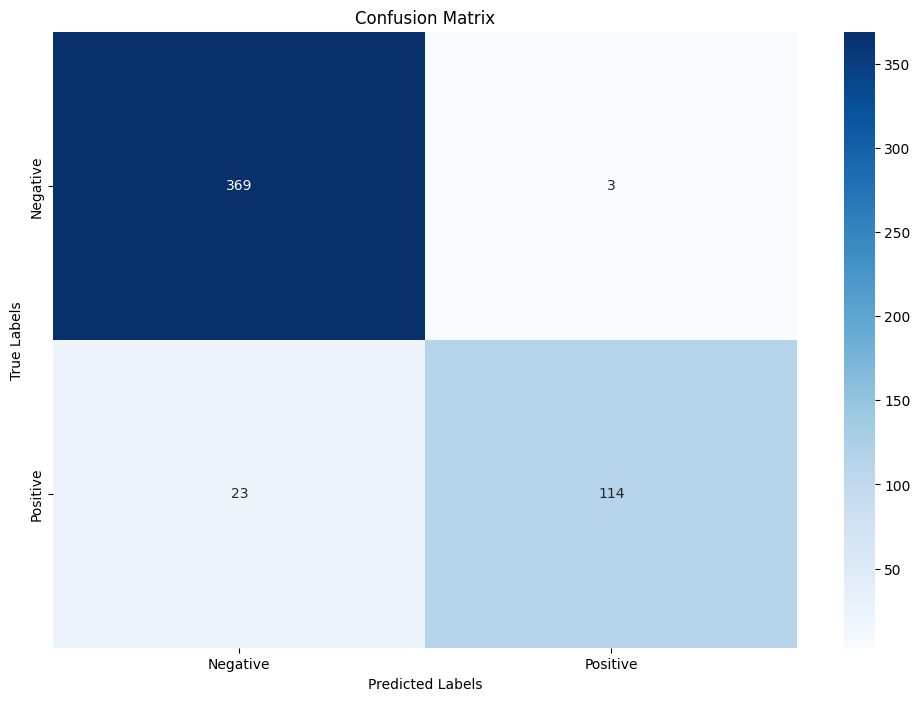

In [26]:
from sklearn.metrics import accuracy_score ,recall_score,precision_score,f1_score ,classification_report, r2_score ,confusion_matrix
plt.figure(figsize=(12,8))

conf_matrix = confusion_matrix(y_test, y_test_pred_binary)

sns.heatmap(conf_matrix, cmap='Blues', annot=True, fmt='g')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

labels = ['Negative', 'Positive']
plt.xticks(np.arange(len(labels))+0.5, labels)
plt.yticks(np.arange(len(labels))+0.5, labels)

plt.show()
